In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import scipy
from sklearn.neighbors import KDTree
from tqdm.autonotebook import tqdm

<ipython-input-1-18a247596c9b>:7: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [2]:
%config InlineBackend.figure_format = "retina"

In [3]:
def read_laserdata(filename="laserdata.txt"):
    df = pd.read_csv(filename, sep=' ', header=None)
    laser_data = df.to_numpy()
    return laser_data


def read_image(filename="test_image_gray.tif"):
    image = plt.imread(filename)
    return image

In [4]:
def read_camera_orientation_info(filename="camera_orientation_info.txt"):

    with open(filename, 'r') as f:
        lines = f.read().splitlines()

    pp_x = float(lines[1])
    pp_y = float(lines[2])
    c = float(lines[4])

    x_0 = float(lines[9])
    y_0 = float(lines[10])
    z_0 = float(lines[11])

    r = np.zeros((3, 3))

    for i in range(3):
        str_row = lines[13 + i].split("\t")
        r[i] = [float(x) for x in str_row]

    return pp_x, pp_y, c, r, x_0, y_0, z_0

In [5]:
laser = read_laserdata()
laser_x = laser[:, 0]
laser_y = laser[:, 1]
laser_z = laser[:, 2]

In [6]:
pp_x, pp_y, c, r, x0, y0, z0 = read_camera_orientation_info()

In [7]:
orthophoto = read_image()
n_pixel_rows, n_pixel_columns = orthophoto.shape

In [8]:
def collinearity_equations(X, Y, Z, c, x0, y0, z0, r):
    
    n = len(X)
    
    x_cam = np.zeros(n)
    y_cam = np.zeros(n)
    
    for i, x, y, z in zip(range(n), X, Y, Z):
        
        denom = r[2, 0]*(x-x0) + r[2, 1]*(y-y0) + r[2, 2]*(z-z0)
    
        x_i = -c * (r[0, 0]*(x-x0) + r[0, 1]*(y-y0) + r[0, 2]*(z-z0)) / denom

        y_i = -c * (r[1, 0]*(x-x0) + r[1, 1]*(y-y0) + r[1, 2]*(z-z0)) / denom
        
        x_cam[i] = x_i
        y_cam[i] = y_i
        
    return x_cam, y_cam

In [32]:
def single_cam2img(x, y):
    return x + pp_x, pp_y - y

In [33]:
def camera_coordinates2image_coordinates(x_camera, y_camera, pp_x, pp_y):
    
    n = len(x_camera)
    x_img = np.zeros(n)
    y_img = np.zeros(n)
    for i, x, y in zip(range(n), x_camera, y_camera):
        x_img[i], y_img[i] = single_cam2img(x, y)
    
    return x_img, y_img
    

In [34]:
def single_img2cam(x, y):
    return x - pp_x, pp_y - y

In [35]:
def image_coordinates2camera_coordinates(x_img, y_img, pp_x, pp_y):
    
    n = len(x_camera)
    x_cam = np.zeros(n)
    y_cam = np.zeros(n)
    for i, x, y in zip(range(n), x_img, y_img):
        x_cam[i], y_cam[i] = single_img2cam(x, y)
    
    return x_cam, y_cam

In [36]:
laser_x_cam, laser_y_cam = collinearity_equations(laser_x, laser_y, laser_z, c, x0, y0, z0, r)
laser_x_img, laser_y_img = camera_coordinates2image_coordinates(laser_x_cam, laser_y_cam, pp_x, pp_y)

In [37]:
laser_x_cam.min(), laser_x.max()

(-1357.0663711190948, 6129.6)

In [38]:
laser_y_cam.min(), laser_y.max()

(276.92112558808634, 5276.468)

In [73]:
x0, y0, z0

(6102.89, 5204.419, 206.241)

In [81]:
pp_x, pp_y

(1433.29, 1013.883)

In [82]:
x_start = 6111.4
y_start = 5267

In [83]:
laser_x.min(), laser_x.max()

(6088.331, 6129.6)

In [84]:
laser_y.min(), laser_y.max()

(5226.271, 5276.468)

In [94]:
pixel_n_x, pixel_n_y = orthophoto.shape[1], orthophoto.shape[0]

In [95]:
from matplotlib import patches

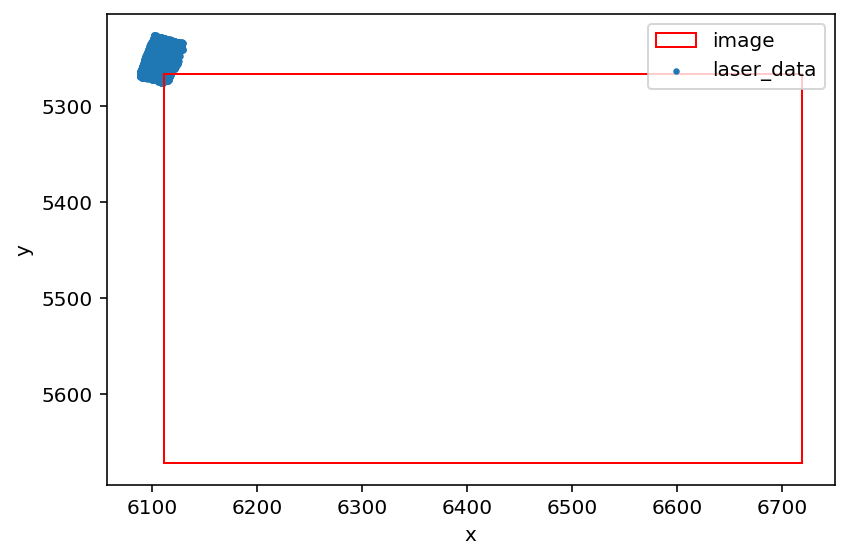

In [102]:
fig, ax = plt.subplots()

ax.scatter(laser_x, laser_y, alpha=1, s=5, label='laser_data')



# Create a Rectangle patch
rect = patches.Rectangle((x_start, y_start), width=0.2*pixel_n_x, \
                         height=0.2*pixel_n_y, linewidth=1, edgecolor='r', facecolor='none',
                         label='image')

# Add the patch to the Axes
ax.add_patch(rect)

ax.legend()

ax.set_xlabel('x')
ax.set_ylabel('y')

ax.invert_yaxis()

plt.tight_layout()

plt.savefig('problem.pdf')

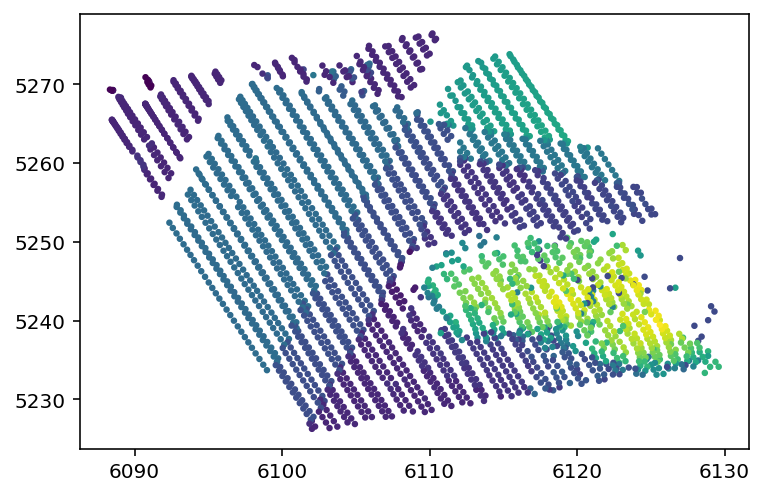

In [105]:
fig, ax = plt.subplots()

ax.scatter(laser_x, laser_y, alpha=1, s=5, c=laser_z, label='laser_data')

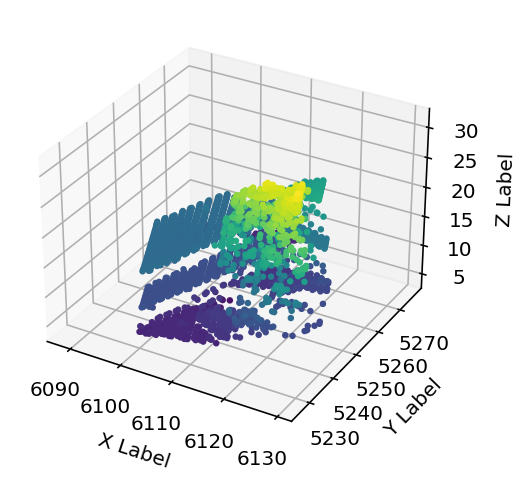

In [109]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

ax.scatter(xs=laser_x, ys=laser_y,zs=laser_z, alpha=1, s=5, c=laser_z, label='laser_data')

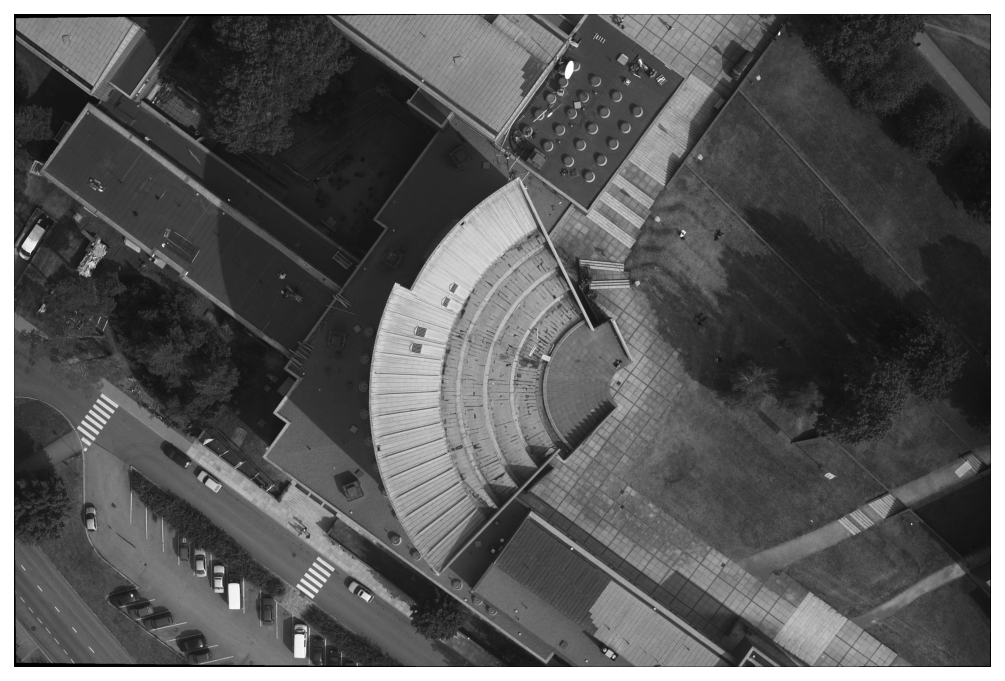

In [44]:
fig, ax = plt.subplots(figsize=(12, 6))

ax.imshow(orthophoto, cmap='gray', vmin=0, vmax=255)
ax.set_axis_off()

plt.show()

Function defines camera orientation

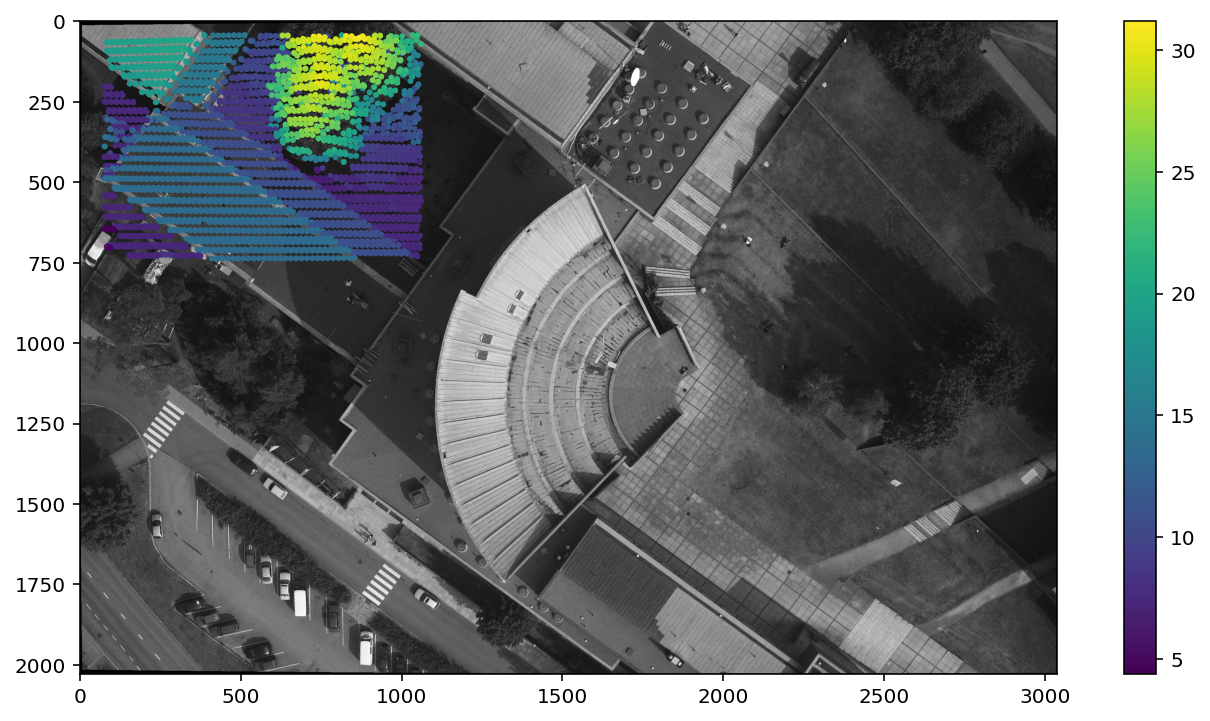

In [45]:
fig, ax = plt.subplots(figsize=(12, 6))

ax.imshow(orthophoto, cmap='gray', vmin=0, vmax=255)

pos = ax.scatter(laser_x_img, laser_y_img, s=4, c=laser_z)

# ax.set_axis_off()

fig.colorbar(pos, ax=ax)

plt.show()

In [46]:
laser_x_img.min(), laser_x_img.max()

(76.22362888090515, 1060.428522887546)

In [47]:
laser_y_img.min(), laser_y_img.max()

(42.528562913274754, 736.9618744119136)

In [48]:
min_row, max_row = int(np.round(laser_y_img.min())), int(np.round(laser_y_img.max()))

In [49]:
min_col, max_col = int(np.round(laser_x_img.min())), int(np.round(laser_x_img.max()))

In [50]:
max_row - min_row

694

In [51]:
max_col - min_col

984

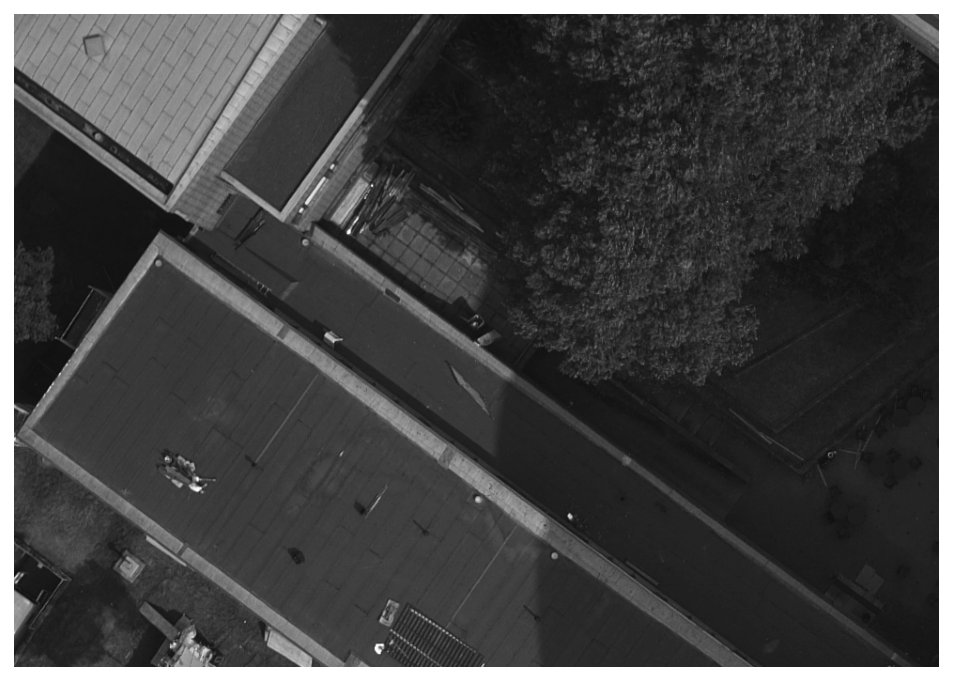

In [53]:
fig, ax = plt.subplots(figsize=(12, 6))

ax.imshow(orthophoto[min_row:max_row+1, min_col:max_col+1], cmap='gray', vmin=0, vmax=255)

ax.set_axis_off();

In [54]:
def d(x, x_i):

    try:
        X, Y = x
        X_i, Y_i = x_i
        return np.sqrt((X - X_i) ** 2 + (Y - Y_i) ** 2)
    except:
        print('was it testing with 1D?')
        return np.sqrt((x - x_i) ** 2)


def w(d_i, p=2):
    return 1 / d_i**p


def u(neighbours_u, neighbours_d):

    n = len(neighbours_d)

    weights = []
    for i in range(n):
        d_i = neighbours_d[i]
        weight_i = w(d_i)
        weights.append(weight_i)

        # print(f'weight {i+1}: {weight_i}')

    sum_weights = np.sum(weights)

    total = 0
    for i in range(n):
        u_i = neighbours_u[i]
        w_i = weights[i]
        to_add = w_i * u_i
        total += to_add

        # print(f'w{i + 1}u{i+1}: {to_add}')

    result = total / sum_weights
    return result

In [55]:
laser_xy_img = np.vstack((laser_x_img, laser_y_img)).T

In [57]:
tree = KDTree(laser_xy_img)

pixels_rows, pixels_columns = max_row - min_row, max_col - min_col
DEM = np.zeros((pixels_rows, pixels_columns))

with tqdm(total=pixels_rows*pixels_columns) as pb:

    for i, Y in enumerate(range(min_row, max_row)):
    
        for j, X in enumerate(range(min_col, max_col)):

            dist, ind = tree.query(np.array([[X, Y], ]), k=5)
            # ind/dist shape: 1 x k
            neighbours_u = laser_z[ind[0]]
            neighbours_d = dist[0]

            interpolated_height = u(neighbours_d=neighbours_d,
                                    neighbours_u=neighbours_u)
            DEM[i, j] = interpolated_height
            pb.update()

  0%|          | 0/682896 [00:00<?, ?it/s]

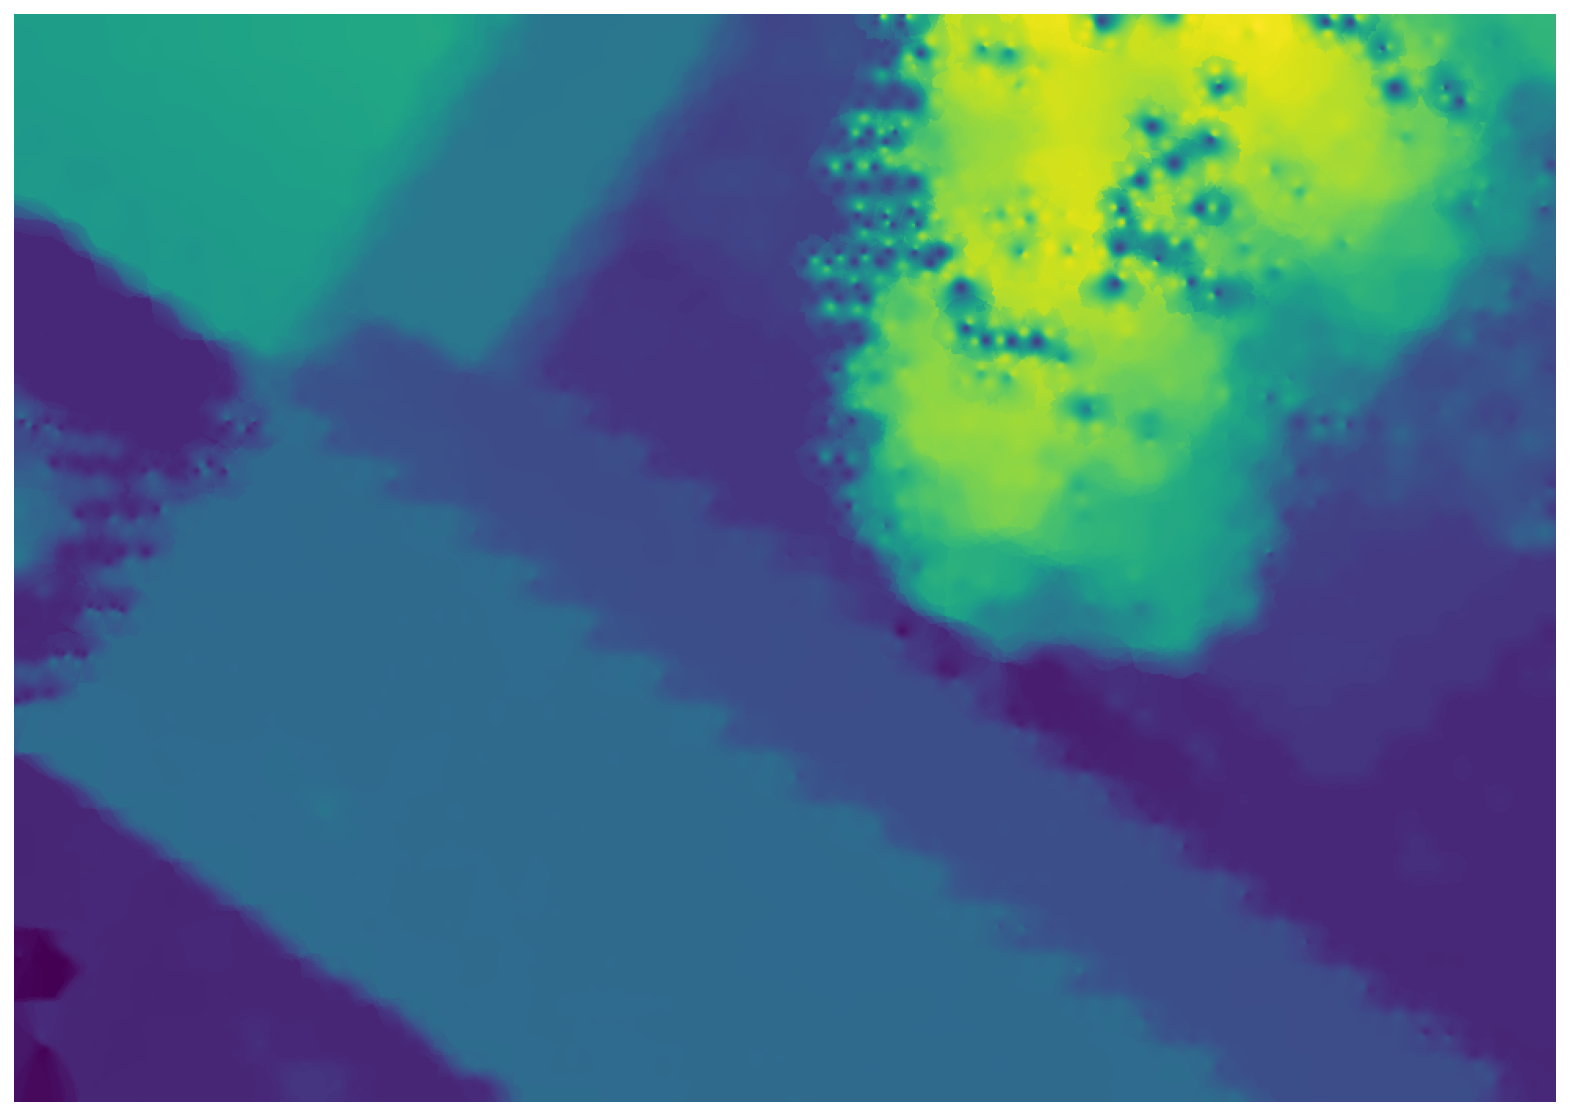

In [58]:
fig, ax = plt.subplots(figsize=(20, 10))

ax.imshow(DEM)
ax.set_axis_off()

plt.savefig("interpolation_height.pdf");

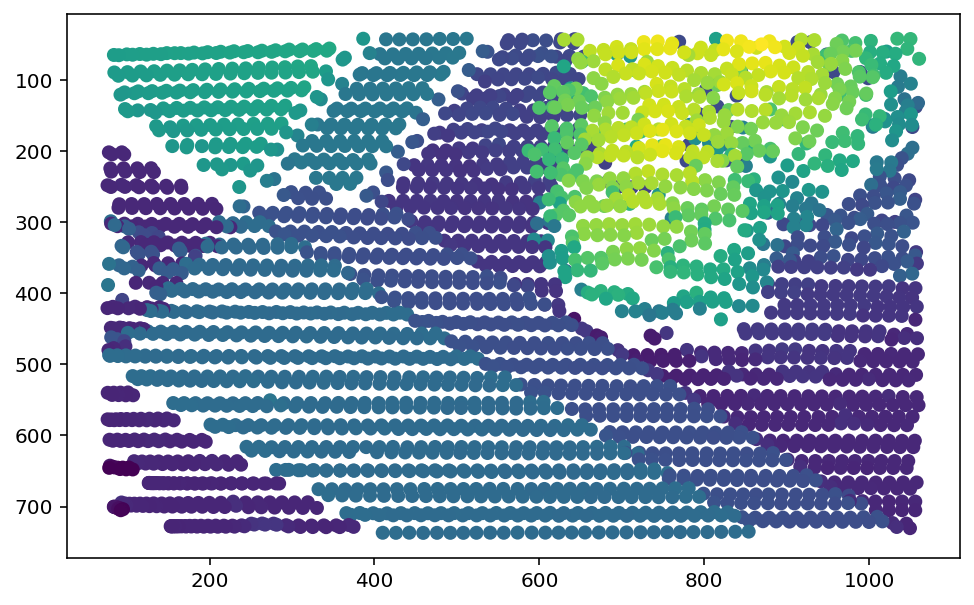

In [104]:
fig, ax = plt.subplots(figsize=(8, 5))
ax.scatter(laser_x_img, laser_y_img, c=laser_z)
ax.invert_yaxis()

plt.savefig("scatter_laser_data.pdf");

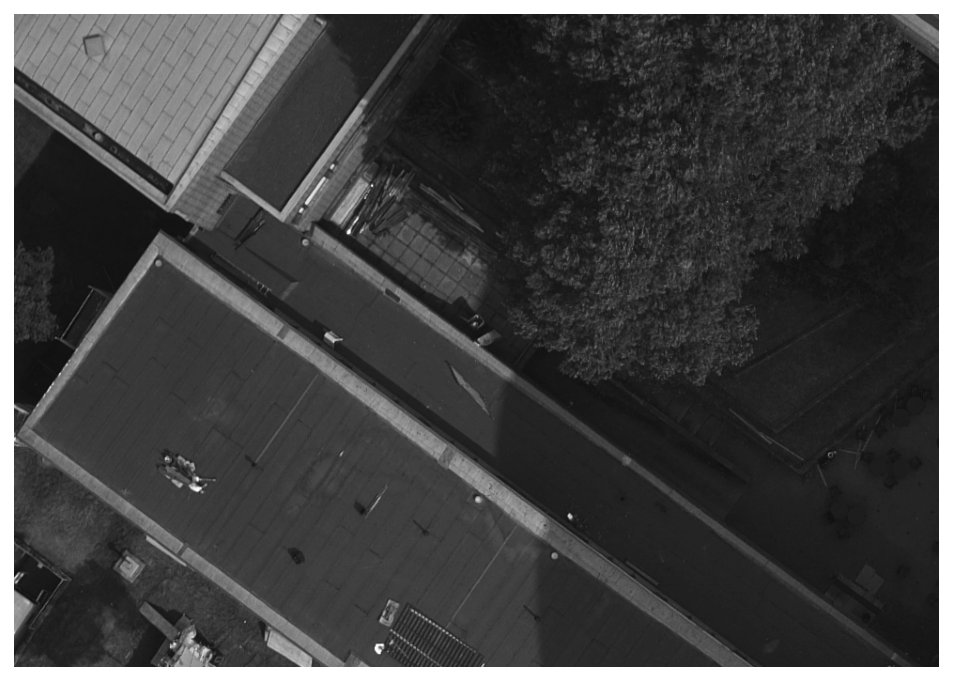

In [60]:
fig, ax = plt.subplots(figsize=(12, 6))

ax.imshow(orthophoto[min_row:max_row+1, min_col:max_col+1], cmap='gray', vmin=0, vmax=255)

ax.set_axis_off()

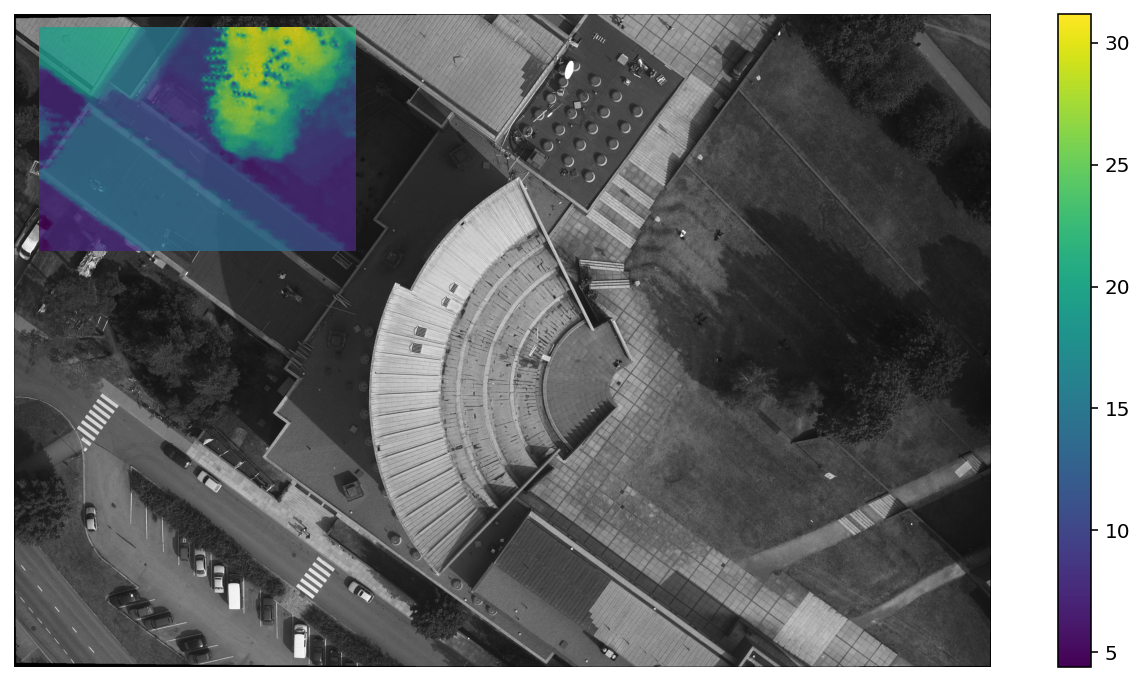

In [61]:
fig, ax = plt.subplots(figsize=(12, 6))

left, right, bottom, top = 0, orthophoto.shape[1], orthophoto.shape[0], 0
ax.imshow(orthophoto, cmap='gray', vmin=0, vmax=255, extent=(left, right, bottom, top))

left, right, bottom, top = min_col, max_col, max_row, min_row
ax.imshow(DEM, extent=(left, right, bottom, top), alpha=0.8)

ax.set_xlim(0, orthophoto.shape[1])
ax.set_ylim(orthophoto.shape[0], 0)

# pos = ax.scatter(x_img, y_img, s=4, c=laser_z)

ax.set_axis_off()

fig.colorbar(pos, ax=ax)


plt.savefig("interpolation_height_original_image.pdf");

plt.show()

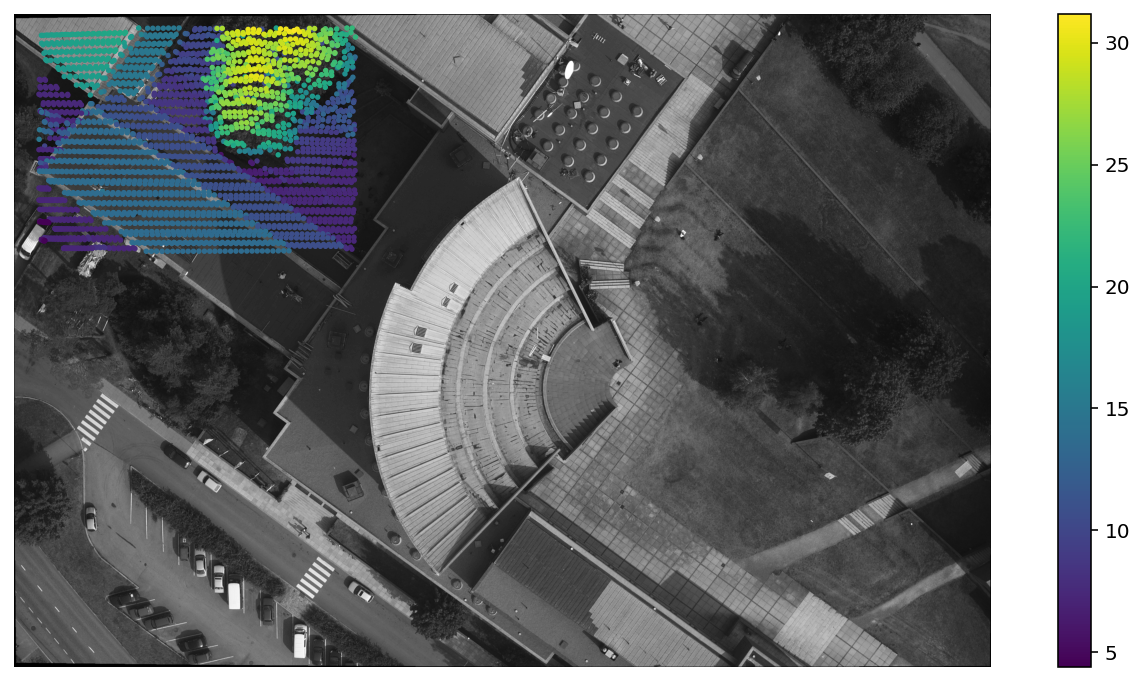

In [63]:
fig, ax = plt.subplots(figsize=(12, 6))

left, right, bottom, top = 0, orthophoto.shape[1], orthophoto.shape[0], 0
ax.imshow(orthophoto, cmap='gray', vmin=0, vmax=255, extent=(left, right, bottom, top))

#left, right, bottom, top = min_col, max_col, max_row, min_row
#ax.imshow(DEM, extent=(left, right, bottom, top), alpha=0.5)

ax.set_xlim(0, orthophoto.shape[1])
ax.set_ylim(orthophoto.shape[0], 0)

pos = ax.scatter(laser_x_img, laser_y_img, s=3, c=laser_z)

ax.set_axis_off()

fig.colorbar(pos, ax=ax)


plt.savefig("scatter_original_image.pdf");

plt.show()

In [ ]:
color1 = row, column
color2 = row, column+1
color3 = row+1, column
color4 = row+1, colum+1

In [ ]:
def bilinear_interpolation(x_image, y_image, color1, color2, color3, color4)

    
